![](OptimumG2018.png)
# Bicycle Model Step and Impulse Response

The following code shows how to you can used python to run vehicle dynamics simulation.
 In this example we will create a bicycle model.
 
 To create the model we will be using state space equations. If you are not familiar with them 
 we recommend that you read the following wikipedia article: https://en.wikipedia.org/wiki/State-space_representation

 The notebook covers the following topics:
 
 * Describe a mathematical plant model of a bicycle
 * Create the state space equations using python's scipy and numpy library
 * Simulate a step and impulse response
 * Plot the results


## Imports

The above statement import 3 libraries that we will be using in this example:


* scipy - Library for scientific computing - It contains the functions that allows us to 
create a state space model and run step, impulse responses.
* numpy - Base N-dimensional array package - Library that allows us to create matrixes and vectors
* matplolib - 2D Plotting tool - Library that allows the user to plot

For more information on these package please visit the following link: https://www.scipy.org/

In [1]:
from IPython import get_ipython
from scipy import signal
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Model Creation

The first step is to define the variable that we will be using.

* $m$ - Vehicle mass
* $C_{\alpha f}$ - Front Cornering Stiffness
* $C_{\alpha r}$ - Rear Cornering Stiffness
* $I_{zz}$ - Vehicle Inertia in Yaw
* $a$ - Front wheelbase
* $b$ - Rear wheelbase

In [2]:
m = 1000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 1650.0 #kg m^2
a = 1.0 #m
b = 2.5 #m

In [3]:
vx = 20

## State Space Equation

$$
\begin{bmatrix}
\dot{v_y}\\
\dot{r}
\end{bmatrix}
=
\begin{bmatrix}
-\dfrac{(C_{\alpha f} + C_{\alpha r})}{(m v_x)} & \dfrac{(-a * C_{\alpha f} + b * C_{\alpha r})}{(mv_x)} - v_x \\
-\dfrac{(a * C_{\alpha f} - b * C_{\alpha r})}{(I_{zz} v_x)} & -\dfrac{(a^2 * C_{\alpha f} + b^2 * C_{\alpha r})}{(I_{zz}*v_x)} \\
\end{bmatrix}
\begin{bmatrix}
v_y\\
r
\end{bmatrix}
+
\begin{bmatrix}
\dfrac{C_{\alpha f}}{m}\\
\\
\dfrac{a * C_{\alpha f}}{I_zz}
\end{bmatrix}
\delta
$$

In [4]:
A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )
print("Coefficient Matrix A: ")
print(A)

Coefficient Matrix A: 
[[ -6.         -15.5       ]
 [  2.72727273 -13.18181818]]


In [5]:
B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)
print("Vector of inputs B: ")
print(B)


Vector of inputs B: 
[[60.        ]
 [36.36363636]]


In [6]:
C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

print("Output Matrix C: ")
print(C)

Output Matrix C: 
[[1 0]
 [0 1]]


In [7]:
D = np.array([[0],[0]])

## Initial Conditions

When smulating the user needs to provide some initials conditions. These conditions are the initial state of the vehicle. You can think of the initial state of the vehicle as the point where you simulation is starting. Are you starting with the vechile from a standpoint? Are you starting with the vehicle at the beggining, end or middle of the corner? The most comment starting point is the starting at 0. The vehicle is in a stand still position. But since the bicycle model is linearize around a constant velocity. When we create the state space model, it is necessary to defined what is the initial longitudinal velocity $v_x$. The reason being that the we simulate exactly before the vehicle is turning.

In [8]:
sys = signal.StateSpace(A,B,C,D)
print(sys)


StateSpaceContinuous(
array([[ -6.        , -15.5       ],
       [  2.72727273, -13.18181818]]),
array([[60.        ],
       [36.36363636]]),
array([[1, 0],
       [0, 1]]),
array([[0],
       [0]]),
dt: None
)


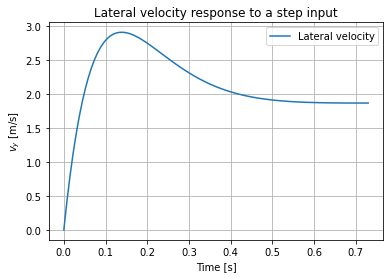

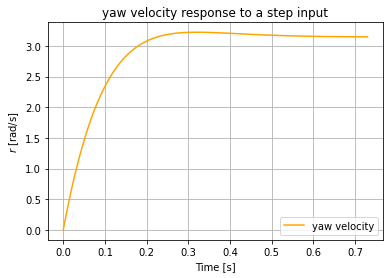

In [9]:
t,y = signal.step(sys)
vy = y[:,0]
r = y[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t,vy)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["Lateral velocity"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t,r, "orange")
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["yaw velocity"])
plt.grid(True)

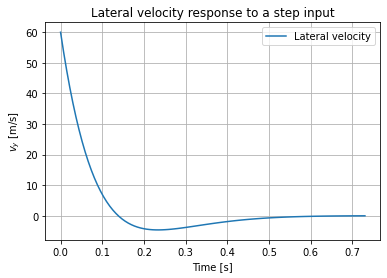

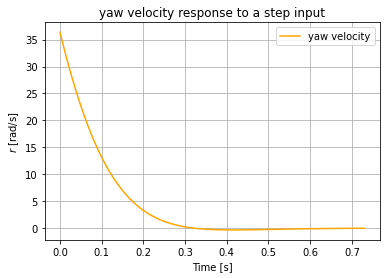

In [10]:
t,y = signal.impulse(sys)
vy = y[:,0]
r = y[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t,vy)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["Lateral velocity"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t,r, "orange")
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["yaw velocity"])
plt.grid(True)


# Conclusion

Feel free to change the parameters and the code. As an exercise we invite you to try:
* Simulate a neutralsteer, oversteer and understeer vehicle.
    * What differences exist between these different vehicles? Qualitatively describe their steady state value, rise time and overshoot. 
    * Physically speaking what is a step input and an impulse response for a vehicle? What can we learn from these analysis?
* Calculate the steady state value, rise time and overshoot
* Simulate the same vehicle at different speeds. How does the vehicle response change? (rise time, steady state value, overshoot) 

Author: Joao Antunes

Date: May, 2020

## Model Limitations

* The vehicle's longitudinal velocity $v_x$ is an input
* Lift, roll and pitch are neglected
* Front and rear tires forces are linear and represented as a single tire on each axle
* The vehicle only models lateral tire force.
* The longitudinal and lateral weight transfer is neglected
* The weight distribution is constant
* Steering wheel angle is unitary and you can instantaneously change the steering value. Not realistic


